In [3]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
#import bokeh.io
#from bokeh.charts import Donut, HeatMap, Histogram, Line, Scatter, show, output_notebook, output_file
from bokeh.plotting import figure
import string
import gensim.models.word2vec as w2v
import multiprocessing
import os
import re
import sklearn
import pprint
import seaborn as sns
import wordcloud
%matplotlib inline

Data Sources
Billboard 1964-2015 Songs + Lyrics
billboard_lyrics_1964-2015.csv
5100 x 6
Billboard 1964-2015 Songs + Lyrics source image
Billboard 1964-2015 Songs + Lyrics
50 years of pop music lyrics
Last Updated: 3 years ago (Version 1)
About this Dataset
Original Dataset Author : https://github.com/walkerkq

From https://github.com/walkerkq/musiclyrics :

50 Years of Pop Music Lyrics
Billboard has published a Year-End Hot 100 every December since 1958. The chart measures the performance of singles in the U.S. throughout the year. Using R, I’ve combined the lyrics from 50 years of Billboard Year-End Hot 100 (1965-2015) into one dataset for analysis. You can download that dataset here.

The songs used for analysis were scraped from Wikipedia’s entry for each Billboard Year-End Hot 100 Songs (e.g., 2014). This is the year-end chart, not weekly rankings. Many artists have made the weekly chart but not the final year end chart. The final chart is calculated using an inverse point system based on the weekly Billboard charts (100 points for a week at number one, 1 point for a week at number 100, etc).


The dataset features 5100 observations with the features rank (1-100), song, artist, year, lyrics, and source. The artist feature is fairly standardized thanks to Wikipedia, but there is still quite a bit of noise when it comes to artist collaborations (Justin Timberlake featuring Timbaland, for example). If there were any errors in the lyrics that were scraped, such as spelling errors or derivatives like "nite" instead of "night," they haven't been corrected.


walkerkq
Acknowledgements
Dataset is a mirror of : https://github.com/walkerkq/musiclyrics All credits to gathering it goes to https://github.com/walkerkq

Inspiration

What makes a song's lyrics popular ?

## What's in our dataset?

In [29]:
data = pd.read_csv("billboard.csv",encoding='latin-1')

In [16]:
len(data)

5100

In [20]:
data.head(10)

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0
5,6,downtown,petula clark,1965,when youre alone and life is making you lonel...,1.0
6,7,help,the beatles,1965,help i need somebody help not just anybody hel...,3.0
7,8,cant you hear my heart beat,hermans hermits,1965,carterlewis every time i see you lookin my way...,5.0
8,9,crying in the chapel,elvis presley,1965,you saw me crying in the chapel the tears i s...,1.0
9,10,my girl,the temptations,1965,ive got sunshine on a cloudy day when its cold...,3.0


## Number of songs by artists 

In [11]:
Artist_Count = data.Artist.value_counts()[:25]
Artist_Count

madonna                35
elton john             25
mariah carey           24
michael jackson        22
janet jackson          22
stevie wonder          20
whitney houston        19
taylor swift           19
rihanna                19
kelly clarkson         17
pink                   17
the beatles            17
the black eyed peas    16
britney spears         16
katy perry             14
usher                  14
chicago                14
boyz ii men            13
the rolling stones     13
kool  the gang         13
phil collins           13
maroon 5               13
r kelly                13
aretha franklin        13
rod stewart            13
Name: Artist, dtype: int64

## Lyrics in songs over time

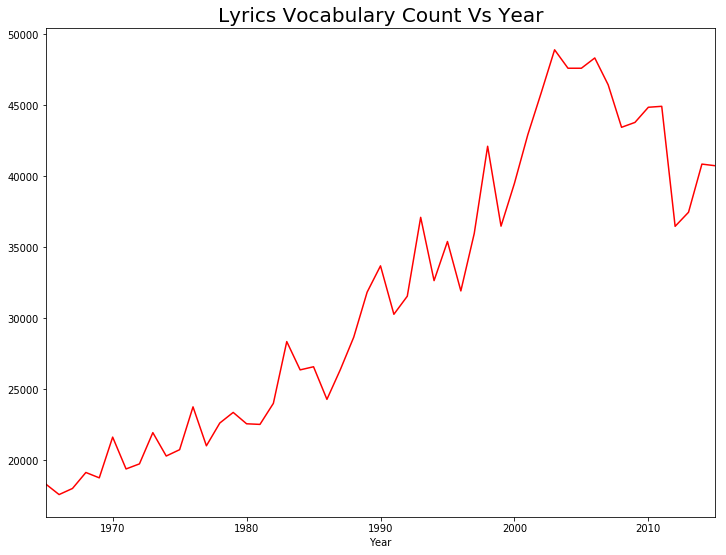

In [12]:
Total_year_count = data.groupby(['Year'])['ly_count'].sum()
plt.figure(figsize=(12,9))
plt.title("Lyrics Vocabulary Count Vs Year",fontsize=20)
Total_year_count.plot(kind='line',color="Red")

## A more specific breakdown by year (check these bars)

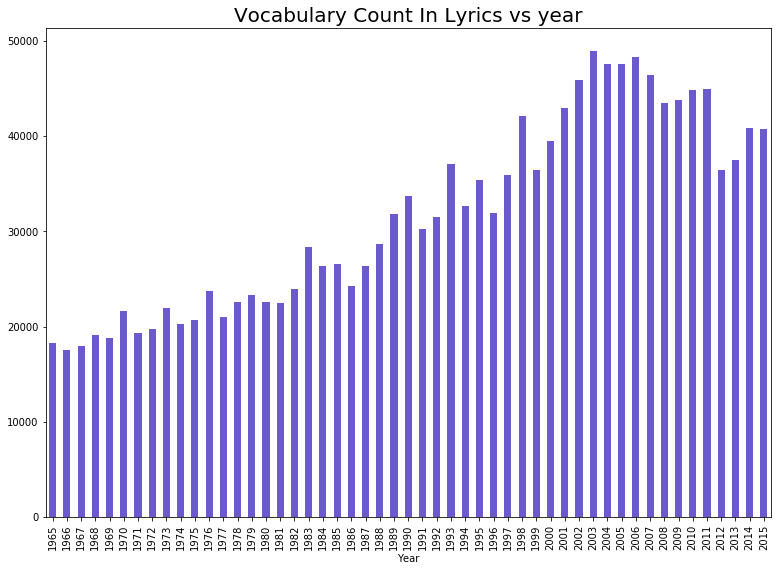

In [21]:
plt.figure(figsize=(13,9))
plt.title("Vocabulary Count In Lyrics vs year",fontsize=20)
Total_year_count.plot(kind='bar',label="Lyrics count vs year",color = 'slateblue')

## Which artist has the most lyrics in their songs

/Users/bradleyrhyins/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


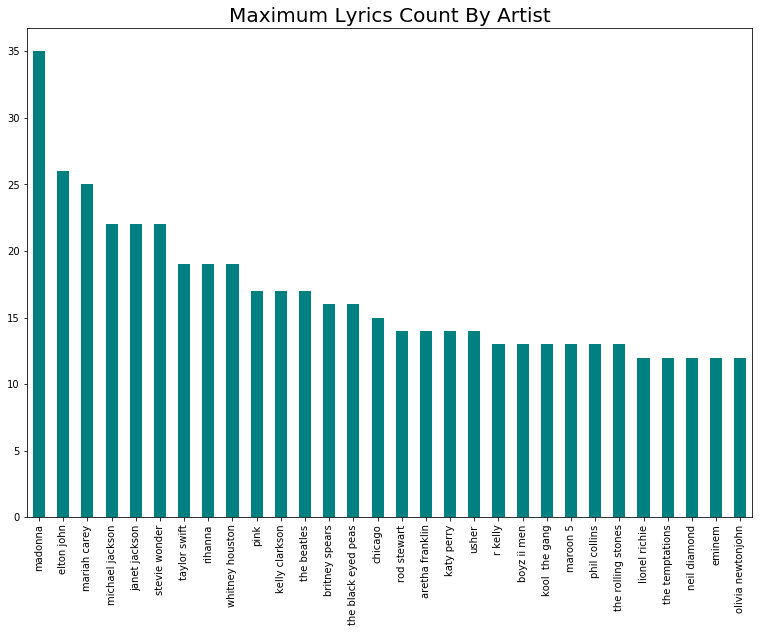

In [22]:
plt.figure(figsize=(13,9))
plt.title("Maximum Lyrics Count By Artist",fontsize=20)
data['Artist'].value_counts()[:30].plot('bar',color='teal')

## Distribution and density of the dataset
When dealing with a set of data, often the first thing you’ll want to do is get a sense for how the variables are distributed. The kernel density estimate may be less familiar seen below, can be a useful tool for plotting the shape of a distribution. Like the histogram, the KDE plots encode the density of observations on one axis with height along the other axis:

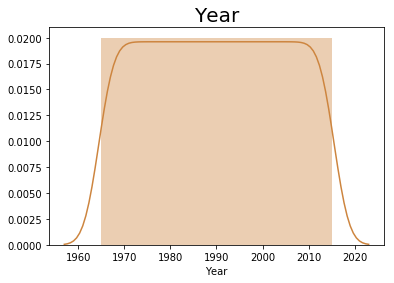

In [32]:
plt.title("Year",fontsize=20)
sns.distplot(data['Year'],color='peru')

In [24]:
yearwise_albums = data.Year.value_counts()
yearwise_albums.head(5)

2015    100
1965    100
2005    100
2001    100
1997    100
Name: Year, dtype: int64

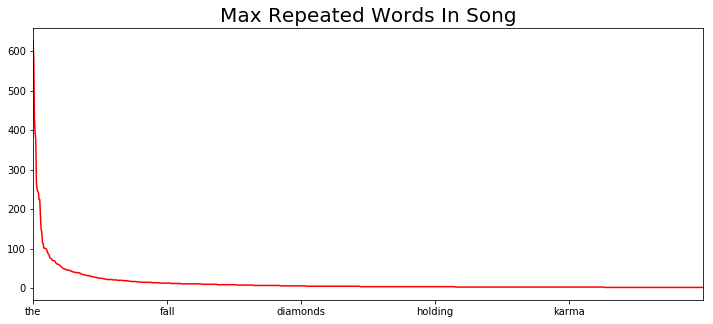

In [25]:
plt.figure(figsize=(12,5))
plt.title("Max Repeated Words In Song",fontsize=20)
words = pd.Series(' '.join(data['Song'].astype(str)).lower().split(" ")).value_counts()[:1000]
words.plot(color='red')

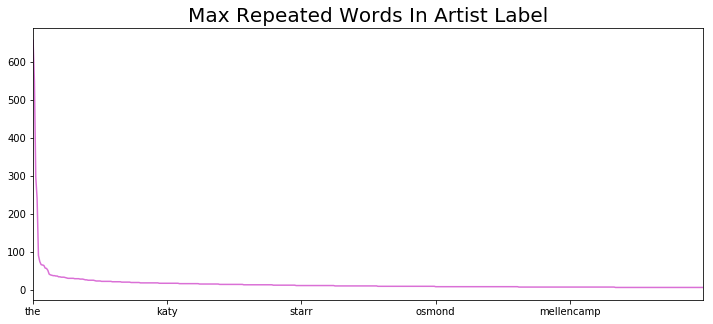

In [26]:
plt.figure(figsize=(12,5))
plt.title("Max Repeated Words In Artist Label",fontsize=20)
words = pd.Series(' '.join(data['Artist'].astype(str)).lower().split(" ")).value_counts()[:500]
words.plot(color='orchid')